# Challenge

## Unit 0

#### **Import libraries**

- 'pandas' to handle data
- 'matplotlib'

In [1]:
# Code here:
import pandas as pd
import matplotlib.pyplot as plt

#### **Load dataset to a dataframe**

You already have the dataset with the name ***'covid19.csv'*** ready in the folder data ;-)

Load the csv into a Pandas DataFrame

In [2]:
df = pd.read_csv('data/covid19.csv')

## Unit 1. First overview

In this chapter we do the first overview of the dataset and should make it (more) usable for the next steps.

#### **Check the head, tail and shape of the dataset**

In [3]:
# Code here:
df.head()

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


In [4]:
df.tail()

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
82870,Zimbabwe,2021-03-17,36552,1508,34136
82871,Zimbabwe,2021-03-18,36611,1509,34226
82872,Zimbabwe,2021-03-19,36652,1510,34249
82873,Zimbabwe,2021-03-20,36662,1510,34257
82874,Zimbabwe,2021-03-21,36665,1512,34269


In [5]:
df.shape

(82875, 5)

#### **Q1. What are the columns of the dataset?**

In [6]:
df.columns

Index(['Country/Region', 'Date (yyyy/mm/dd)', 'Confirmed cases', 'Death cases',
       'Recovered cases'],
      dtype='object')

##### **Q1.1. Rename the columns of the dataset to make it easier to work with.**
Use the follow dictionary to rename the columns:
```
{'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
}
```

In [7]:
dic = {'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
}
df.rename(columns=dic)

,country,date,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
82870,Zimbabwe,2021-03-17,36552,1508,34136
82871,Zimbabwe,2021-03-18,36611,1509,34226
82872,Zimbabwe,2021-03-19,36652,1510,34249
82873,Zimbabwe,2021-03-20,36662,1510,34257


#### **Q2. What is the type of each column of the dataset?**

In [8]:
# Code here:
df.dtypes

Country/Region       object
Date (yyyy/mm/dd)    object
Confirmed cases       int64
Death cases           int64
Recovered cases       int64
dtype: object

##### **Q2.1. Change the type of the 'date' column to datetime.**

In [9]:
# Code here:
df['Date (yyyy/mm/dd)'] = pd.to_datetime(df['Date (yyyy/mm/dd)'])
df.dtypes

Country/Region               object
Date (yyyy/mm/dd)    datetime64[ns]
Confirmed cases               int64
Death cases                   int64
Recovered cases               int64
dtype: object

#### **Q3. Do we have "nulls" in the dataset?**

In [10]:
# Code here:
a = df.isnull()
b = a.sum()
b

Country/Region       0
Date (yyyy/mm/dd)    0
Confirmed cases      0
Death cases          0
Recovered cases      0
dtype: int64

#### **Q4. How many countries do we have represented in the dataset?**

In [11]:
# Code here:
df['Country/Region'].describe()

count       82875
unique        195
top       Hungary
freq          425
Name: Country/Region, dtype: object

#### **Q5. What is the first and the last 'date' of the dataset?**

In [12]:
# Code here:
df['Date (yyyy/mm/dd)'].min()

Timestamp('2020-01-22 00:00:00')

In [13]:
df['Date (yyyy/mm/dd)'].max()

Timestamp('2021-03-21 00:00:00')

## Unit 2. Data Analysis: Worldwide

Time to make some worldwide analysis looking at global metrics and comparing countries.

#### **Q6. We checked before that we have data for 'confirmed', 'recovered' and 'deaths' cases but something is missing... Add the column for 'active' cases to the dataset.**

In [14]:
# Code here:
df['active'] = df['Confirmed cases'] - (df['Death cases'] + df['Recovered cases'])
df.head()

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases,active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0


#### **Q7. Create a dataset that have the cumulative ACTIVE cases worldwide per day.**

In [15]:
# Code here:
cumulative_active = df.groupby('Date (yyyy/mm/dd)')['active'].sum().cumsum()
cumulative_active_df = pd.DataFrame({'Date (yyyy/mm/dd)': cumulative_active.index, 'cumulative_active': cumulative_active.values})
print(cumulative_active_df.head())

  Date (yyyy/mm/dd)  cumulative_active
0        2020-01-22                510
1        2020-01-23               1115
2        2020-01-24               1991
3        2020-01-25               3341
4        2020-01-26               5347


In [16]:
cumulative_active = df.groupby('Date (yyyy/mm/dd)')['active'].sum().cumsum()
cumulative_active

Date (yyyy/mm/dd)
2020-01-22           510
2020-01-23          1115
2020-01-24          1991
2020-01-25          3341
2020-01-26          5347
                 ...    
2021-03-17    6002255279
2021-03-18    6052335848
2021-03-19    6102688295
2021-03-20    6153273846
2021-03-21    6203995415
Name: active, Length: 425, dtype: int64

![showtime](https://media.giphy.com/media/13ZVRnWnmSMaRy/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q8. Plot the curve with the evolution of the active cases worlwide.**

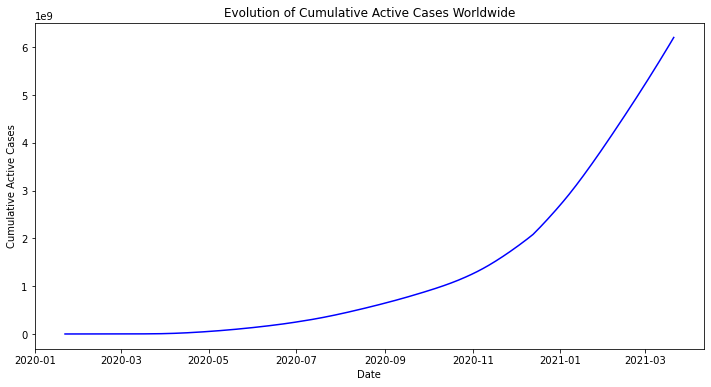

In [17]:
# Code here:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_active_df['Date (yyyy/mm/dd)'], cumulative_active_df['cumulative_active'], color='blue', label='Cumulative Active Cases')

plt.xlabel('Date')
plt.ylabel('Cumulative Active Cases')
plt.title('Evolution of Cumulative Active Cases Worldwide')

plt.show()


#### **Q9. Get the top 10 countries by confirmed cases and plot a bar chart with the top 10 countries with more confirmed cases.**
> **Hint**: You can filter the dataset by the latest day of the dataset (it has the number of confirmed cases in each country). Then sort the values by 'confirmed' and use `head(10)` to get the top 10.

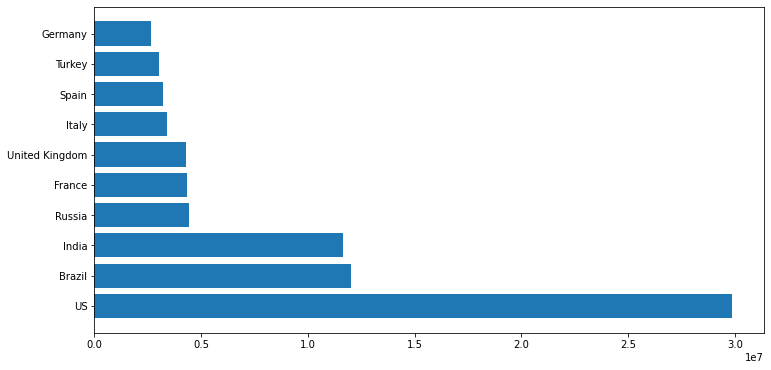

In [18]:
# Code here to get the top 10:
new_data = df[df['Date (yyyy/mm/dd)'] == df['Date (yyyy/mm/dd)'].max()]
top = new_data.sort_values(by='Confirmed cases', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top['Country/Region'], top['Confirmed cases'])
plt.show()

In [19]:
# Code here to plot the bar chart:


#### **Q10. Calculate the recovery percentage and mortality rate for each country in latest day**

> **Hint:** Create a dataset with just the last date and create a column for each of the ratios we want:

In [20]:
# Code here:
last_data = new_data.copy()
last_data['recovery_rate'] = (last_data['Recovered cases'] / last_data['Confirmed cases']) * 100
last_data['mortality_rate'] = (last_data['Death cases'] / last_data['Confirmed cases']) * 100
print(last_data)

           Country/Region Date (yyyy/mm/dd)  Confirmed cases  Death cases  \
424           Afghanistan        2021-03-21            56103         2463   
849               Albania        2021-03-21           121200         2137   
1274              Algeria        2021-03-21           116157         3057   
1699              Andorra        2021-03-21            11517          113   
2124               Angola        2021-03-21            21733          527   
...                   ...               ...              ...          ...   
81174             Vietnam        2021-03-21             2572           35   
81599  West Bank and Gaza        2021-03-21           223638         2427   
82024               Yemen        2021-03-21             3418          751   
82449              Zambia        2021-03-21            86449         1179   
82874            Zimbabwe        2021-03-21            36665         1512   

       Recovered cases  active  recovery_rate  mortality_rate  
424        

![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Netherlands has the highest recovery percentage in the world!*


##### **Q10.1. Is this a fake news?**

In [21]:
# Code here:
sorted_data = last_data.sort_values(by='recovery_rate', ascending=False)
print(sorted_data)

             Country/Region Date (yyyy/mm/dd)  Confirmed cases  Death cases  \
49724            Micronesia        2021-03-21                1            0   
48024      Marshall Islands        2021-03-21                4            0   
8499                 Bhutan        2021-03-21              869            1   
67149             Singapore        2021-03-21            60196           30   
33574               Iceland        2021-03-21             6097           29   
...                     ...               ...              ...          ...   
72249                Sweden        2021-03-21           744272        13262   
77349                    US        2021-03-21         29875211       542679   
39099              Kiribati        2021-03-21                0            0   
57374                 Palau        2021-03-21                0            0   
71399  Summer Olympics 2020        2021-03-21                0            0   

       Recovered cases    active  recovery_rate  mo

# Yes!

## Unit 3. Data analysis - GERMANY

From now on, you will only analyse **Germany** that should be selected from the list below.

#### **Q11. Get a dataset that contains only information regarding your country.**

In [22]:
# Code here:
Germany_data = df[df['Country/Region'] == 'Germany']
Germany_data

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases,active
28050,Germany,2020-01-22,0,0,0,0
28051,Germany,2020-01-23,0,0,0,0
28052,Germany,2020-01-24,0,0,0,0
28053,Germany,2020-01-25,0,0,0,0
28054,Germany,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
28470,Germany,2021-03-17,2610769,74043,2387743,148983
28471,Germany,2021-03-18,2639258,74402,2405600,159256
28472,Germany,2021-03-19,2654734,74608,2413584,166542
28473,Germany,2021-03-20,2669233,74706,2419292,175235


#### **Q12. Create a dataset that only contains information since the day that was registered the first case in your country. Tell us what is that day and how many cases were registered in that day?**

In [23]:
# Code here:
Germany_from_first_day = Germany_data[Germany_data['Confirmed cases'] > 0]
Germany_from_first_day

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases,active
28055,Germany,2020-01-27,1,0,0,1
28056,Germany,2020-01-28,4,0,0,4
28057,Germany,2020-01-29,4,0,0,4
28058,Germany,2020-01-30,4,0,0,4
28059,Germany,2020-01-31,5,0,0,5
...,...,...,...,...,...,...
28470,Germany,2021-03-17,2610769,74043,2387743,148983
28471,Germany,2021-03-18,2639258,74402,2405600,159256
28472,Germany,2021-03-19,2654734,74608,2413584,166542
28473,Germany,2021-03-20,2669233,74706,2419292,175235


#### **Q13. Get a column with the confirmed cases in proportion to 1M of the population.**

Consider that Germany population is 83783942.

In [24]:
# Code here:
Germany_from_first_day['confirmed per 1m'] = (Germany_from_first_day['Confirmed cases'] * (1000000 / 83783942))
Germany_from_first_day

<ipython-input-24-a400d4dae31a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Germany_from_first_day['confirmed per 1m'] = (Germany_from_first_day['Confirmed cases'] * (1000000 / 83783942))


,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases,active,confirmed per 1m
28055,Germany,2020-01-27,1,0,0,1,0.011935
28056,Germany,2020-01-28,4,0,0,4,0.047742
28057,Germany,2020-01-29,4,0,0,4,0.047742
28058,Germany,2020-01-30,4,0,0,4,0.047742
28059,Germany,2020-01-31,5,0,0,5,0.059677
...,...,...,...,...,...,...,...
28470,Germany,2021-03-17,2610769,74043,2387743,148983,31160.732447
28471,Germany,2021-03-18,2639258,74402,2405600,159256,31500.761805
28472,Germany,2021-03-19,2654734,74608,2413584,166542,31685.475004
28473,Germany,2021-03-20,2669233,74706,2419292,175235,31858.527258


#### **Q14. Get a column that register the number of days since the first case was registered.**

Hint: you might need to use the ".dt.days" from the difference betweenn dates

In [25]:
Germany_from_first_day.loc[28055, 'Date (yyyy/mm/dd)']

Timestamp('2020-01-27 00:00:00')

In [26]:
# Code here:
first_date = Germany_from_first_day.loc[28055, 'Date (yyyy/mm/dd)']
Germany_from_first_day['days_since_first_case'] = (Germany_from_first_day['Date (yyyy/mm/dd)'] - first_date).dt.days
print(Germany_from_first_day)


      Country/Region Date (yyyy/mm/dd)  Confirmed cases  Death cases  \
28055        Germany        2020-01-27                1            0   
28056        Germany        2020-01-28                4            0   
28057        Germany        2020-01-29                4            0   
28058        Germany        2020-01-30                4            0   
28059        Germany        2020-01-31                5            0   
...              ...               ...              ...          ...   
28470        Germany        2021-03-17          2610769        74043   
28471        Germany        2021-03-18          2639258        74402   
28472        Germany        2021-03-19          2654734        74608   
28473        Germany        2021-03-20          2669233        74706   
28474        Germany        2021-03-21          2670001        74756   

       Recovered cases  active  confirmed per 1m  days_since_first_case  
28055                0       1          0.011935             

<ipython-input-26-aac1bf564490>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Germany_from_first_day['days_since_first_case'] = (Germany_from_first_day['Date (yyyy/mm/dd)'] - first_date).dt.days


![showtime](https://media.giphy.com/media/fxqt51CAMGITJlxcRI/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q15. Plot the cruve with evolution of confirmed cases per 1M of population since the 1st case for your country**

Make sure you define a title and the x and y labels

Text(0.5, 1.0, 'Evolution of Confirmed Cases per 1M Population in Germany')

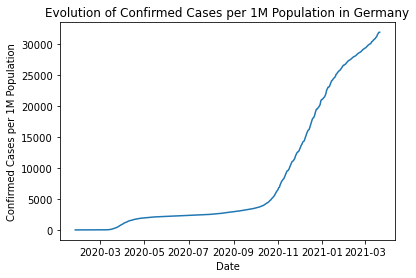

In [27]:
# Code here:
plt.figure
plt.plot(Germany_from_first_day['Date (yyyy/mm/dd)'],
         Germany_from_first_day['confirmed per 1m'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases per 1M Population')
plt.title(f'Evolution of Confirmed Cases per 1M Population in Germany')

#### Q16. Export the final germany dataset without the column of "death cases" to a csv file

In [28]:
# Code here:
Germany_data_final = Germany_from_first_day.drop(columns=['Death cases'])

csv_file_path = 'germany_data_final.csv'

Germany_data_final.to_csv(csv_file_path, index=False)

**EXTRA: Q17. Plot the curve with evolution of confirmed cases per 1M of population since the 1st case for multiple countries and compare its evolution**

Consider the following countries and respective population values

In [29]:
population = {'US': 331002651,'Spain': 46754778,'Italy': 60461826,'Portugal': 10196709,
                'United Kingdom': 67886011,'Germany': 83783942,'Norway': 5421241,
                'Belgium': 11589623,'Netherlands': 17134872,'Sweden': 10086360}

In [30]:
countries = list(population)
countries

['US',
 'Spain',
 'Italy',
 'Portugal',
 'United Kingdom',
 'Germany',
 'Norway',
 'Belgium',
 'Netherlands',
 'Sweden']

In [31]:
selected_countries_data = pd.DataFrame()

for country in countries:
    country_data = df[df['Country/Region'] == country].copy()
    country_data['confirmed_per_million'] = (country_data['Confirmed cases'] / population[country]) * 1000000
    country_data = country_data[country_data['confirmed_per_million'] > 0]
    selected_countries_data = selected_countries_data.append(country_data)

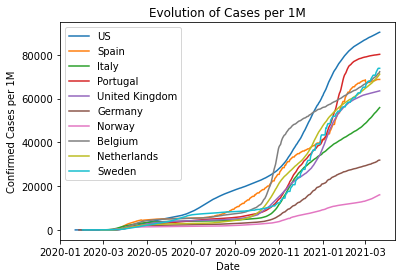

In [32]:
for country in countries:
    country_data = selected_countries_data[selected_countries_data['Country/Region'] == country]
    plt.plot(country_data['Date (yyyy/mm/dd)'], country_data['confirmed_per_million'], label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases per 1M')
plt.title('Evolution of Cases per 1M')
plt.legend()

## The end!

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)